In [1]:
## Bowling Analysis
#Bowler performance based on economy rate and wickets.


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


In [2]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(CASE WHEN bd.is_wicket = 1 THEN 1 END) AS wickets,
    SUM(bd.runs_total) AS runs_conceded,
    COUNT(*) AS balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 24
"""
df = pd.read_sql(query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_12384\3586635392.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


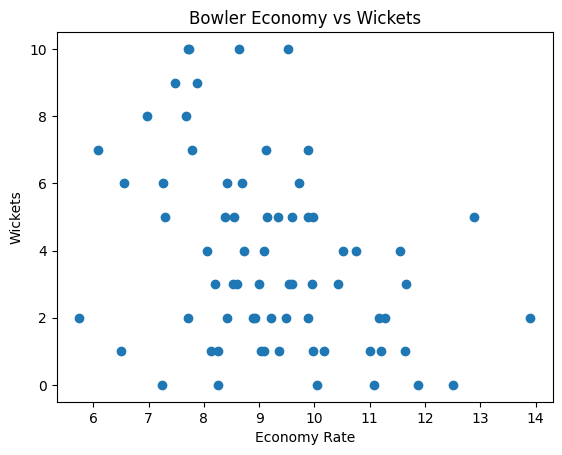

In [3]:
df["overs"] = df["balls"] / 6
df["economy"] = df["runs_conceded"] / df["overs"]

plt.figure()
plt.scatter(df["economy"], df["wickets"])
plt.xlabel("Economy Rate")
plt.ylabel("Wickets")
plt.title("Bowler Economy vs Wickets")
plt.show()


(119, 6)


C:\Users\hp\AppData\Local\Temp\ipykernel_12384\69864942.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Text(0.5, 1.0, 'Dot Ball %')

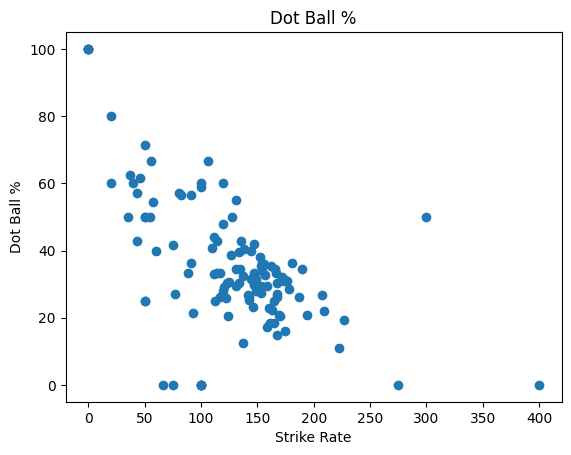

In [4]:
query = """
SELECT
    p.player_name,
    COUNT(*) AS balls,
    SUM(bd.runs_batter) AS runs,
    SUM(CASE WHEN bd.runs_total = 0 THEN 1 ELSE 0 END) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 1
"""
df = pd.read_sql(query, conn)

df["strike_rate"] = (df["runs"] / df["balls"]) * 100
df["dot_ball_pct"] = (df["dot_balls"] / df["balls"]) * 100
print(df.shape)
df.head()

plt.figure()
plt.scatter(df["strike_rate"], df["dot_ball_pct"])
plt.xlabel("Strike Rate")
plt.ylabel("Dot Ball %")
plt.title("Dot Ball %")


In [ ]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS balls,
    SUM(CASE WHEN bd.runs_total = 0 THEN 1 ELSE 0 END) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 24
"""
df = pd.read_sql(query, conn)

df["dot_ball_pct"] = (df["dot_balls"] / df["balls"]) * 100
df = df.sort_values("dot_ball_pct", ascending=False).head(10)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_29472\4228221649.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,balls,dot_balls,dot_ball_pct
37,Kuldeep Yadav,48,27.0,56.250000
0,JR Hazlewood,72,40.0,55.555556
21,KK Ahmed,74,38.0,51.351351
47,M Prasidh Krishna,66,32.0,48.484848
59,B Kumar,43,19.0,44.186047
33,MA Starc,48,21.0,43.750000
8,CV Varun,92,40.0,43.478261
7,SH Johnson,53,22.0,41.509434
30,MJ Santner,52,21.0,40.384615
28,DL Chahar,51,20.0,39.215686


In [5]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS sixes_conceded
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
WHERE bd.is_six = 1
GROUP BY p.player_name
ORDER BY sixes_conceded DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_12384\2817766506.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,sixes_conceded
0,Ravi Bishnoi,14
1,Simarjeet Singh,13
2,Rashid Khan,11
3,PJ Cummins,11
4,SN Thakur,10
5,Avesh Khan,10
6,SP Narine,9
7,JR Hazlewood,8
8,V Puthur,8
9,JC Archer,8


In [ ]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS fours_conceded
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
WHERE bd.is_four = 1
GROUP BY p.player_name
ORDER BY fours_conceded DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_29472\602396491.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,fours_conceded
0,Mohammed Shami,14
1,PJ Cummins,14
2,KK Ahmed,13
3,VG Arora,13
4,JC Archer,13
5,Harshit Rana,12
6,Mohammed Siraj,11
7,M Theekshana,11
8,JR Hazlewood,10
9,R Ashwin,10


In [6]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
WHERE bd.runs_total = 0
  AND bd.is_wide = 0
  AND bd.is_no_ball = 0
GROUP BY p.player_name
ORDER BY dot_balls DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_12384\3250593077.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,dot_balls
0,JR Hazlewood,52
1,KK Ahmed,47
2,CV Varun,47
3,Mohammed Siraj,46
4,DS Rathi,41
5,TA Boult,40
6,M Prasidh Krishna,40
7,Mohammed Shami,37
8,R Sai Kishore,35
9,VG Arora,34
